# **Data Processing Approach for Portfolio Project**

**Project Title: Student Dropout and Success Prediction**

**Student Name: Mohamed Ahmed Yasin**

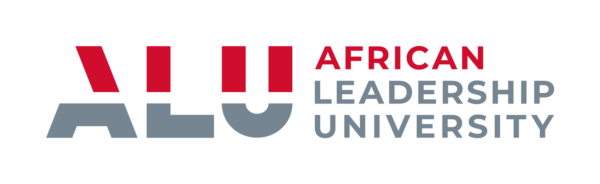

---

# 1. **Data Sources and Aggregation:**

  ***- List all sources of data for the project. You must consider sources outside kaggle, google datasets (insert links where necessary to online platforms,research papers etc)***

A. **Dataset:** Predict students' dropout and academic success

**Description:** This dataset provides a comprehensive view of students enrolled in various undergraduate degrees offered at a higher education institution.

**Source:** `Kaggle`.

**Link:** (https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention)

B. **Dataset:** Predict Students' Dropout and Academic Success

**Description:** Provides a dataset containing information about students' academic performance and dropout indicators.

**Source:** `UCI Machine Learning Repository`.

**Link:** (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

C. **Research Paper** - Machine Learning Model for Predicting Student Dropout

**Description:** Focuses on dropout prediction in Tanzania, Kenya, and Uganda using machine learning.

**Source:** `IEEE Xplore`.

**Link:** https://ieeexplore.ieee.org/document/9570956


   **- Determine if data aggregation from multiple sources is necessary for comprehensive analysis.**

   Yes, I believe data aggregation from multiple sources is necessary for comprehensive analysis because no single dataset typically captures all the factors influencing student dropout rates, such as academic performance, socioeconomic status,and regional or cultural influences. Aggregating data from sources like the UCI repository and the IEEE Xplore studies can provide a richer, multidimensional perspective. This integration ensures that key variables are included, enhances model generalizability, and allows for more accurate predictions tailored to diverse populations or regions.



In [34]:
import os
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths for the datasets in Google Drive
source_dirs = [
    '/content/drive/MyDrive/datasset1.csv',  # Path to dataset1.csv
    '/content/drive/MyDrive/datasset2.csv',  # Path to dataset2.csv
]

# Define the target folder for aggregated data
target_base_dir = '/content/drive/MyDrive/Aggregated_Data'

# Create the target directory if it does not exist
os.makedirs(target_base_dir, exist_ok=True)

# Iterate through each dataset
for i, source_file in enumerate(source_dirs, start=1):
    if not os.path.exists(source_file):
        print(f"Source file {source_file} does not exist. Skipping.")
        continue

    # Define the target file path
    file_name = os.path.basename(source_file)
    dest_file = os.path.join(target_base_dir, f"{i}_{file_name}")

    # Copy the file
    shutil.copy(source_file, dest_file)
    print(f"Copied {source_file} to {dest_file}")

print("CSV data aggregation complete.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied /content/drive/MyDrive/datasset1.csv to /content/drive/MyDrive/Aggregated_Data/1_datasset1.csv
Copied /content/drive/MyDrive/datasset2.csv to /content/drive/MyDrive/Aggregated_Data/2_datasset2.csv
CSV data aggregation complete.




# 2. **Data Format Transformation:**

   **- Describe the current format of the data.**
   **- Outline the planned transformation to a unified format suitable for analysis and modeling.**

   ### **Data Format Transformation**

#### **Current Format of the Data**  
The data is currently in CSV format, which is a structured, tabular format with rows representing individual records (e.g., students) and columns representing features (e.g., Marital status, Gender, Course, Target, etc).

#### **Planned Transformation**  
1. **Data Cleaning**:  
   - Remove or handle missing values in critical columns (e.g., target, inflation).  
   - Ensure column names are consistent and descriptive.  

2. **Standardization**:  
   - Standardize data types (e.g., numeric for grades, categorical for gender).  
   - Parse dates into a consistent format if applicable.  

3. **Normalization/Scaling**:  
   - Normalize numerical data (e.g., admission grades, age at enrollment) to bring them to a consistent scale suitable for modeling.  

4. **Encoding**:  
   - Convert categorical variables (e.g., target) into numeric representations using one-hot encoding or label encoding.  

5. **Feature Engineering**:  
   - Create new features (e.g., cumulative GPA, average attendance rate).  
   - Remove irrelevant or redundant columns.  

6. **Dataset Splitting**:  
   - Split the CSV into training and testing sets to prepare for model evaluation.  

These transformations will ensure the dataset is ready for more advanced machine learning analysis.



# 3. **Data Exploration:**

  **- Enumerate the features included in the dataset.**

  The dataset includes several features for analysis such as:

**- Gender**: A basic demographic feature that may influence dropout rates.

**- Marital status**: Can indicate life circumstances that may affect a student's ability to stay enrolled.

**- Debtor**: Financial challenges may increase the likelihood of dropping out.  

**- Course**: The program enrolled may impact dropout likelihood due to varying difficulty or interest.

**- Target**: The target variable that the model will predict which is either enrolled, dropout or graduate.
   
 **- Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.**

The initial EDA includes examining the following aspects:

**Class Distribution:** Checking the distribution of the target variable (dropout vs. non-dropout) to ensure a balanced dataset. Imbalanced data could impact model performance by favoring the majority class.

**Feature Distributions:** Analyzing the distribution of key features to identify any skewed patterns or inconsistencies that may need transformation, such as normalization or binning.

**Correlations:** Investigating the relationships between various features to uncover any strong correlations that could inform model predictions or suggest feature engineering opportunities.

**Outliers:** Identifying any extreme values or anomalies in the data that may distort model training, which may require special handling or removal to ensure the model performs well.


 **Insert code for data exploration below**

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation        

<ipython-input-37-46d821539843>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='pastel')


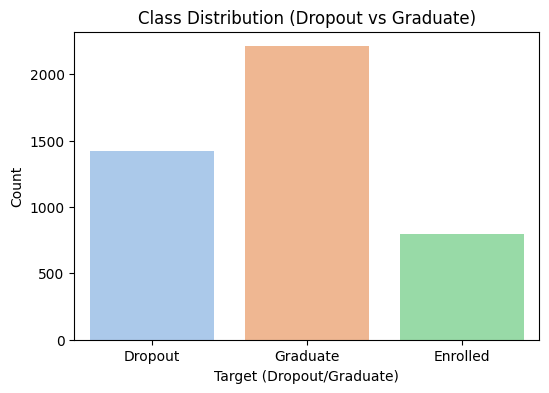

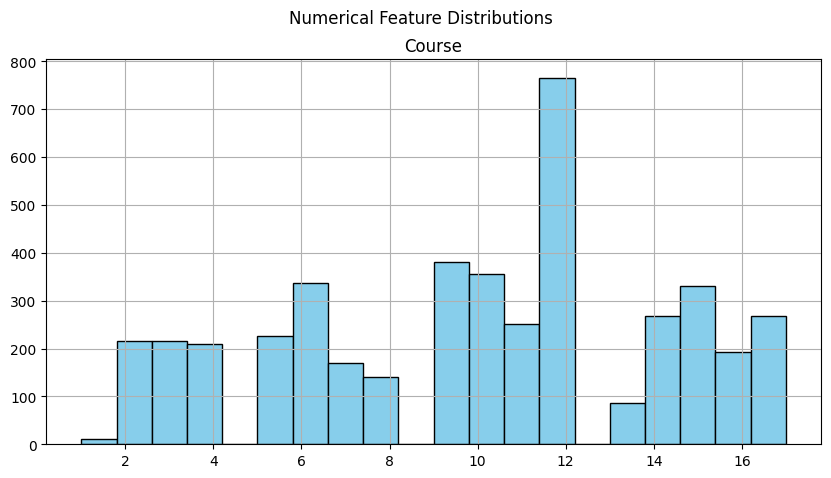

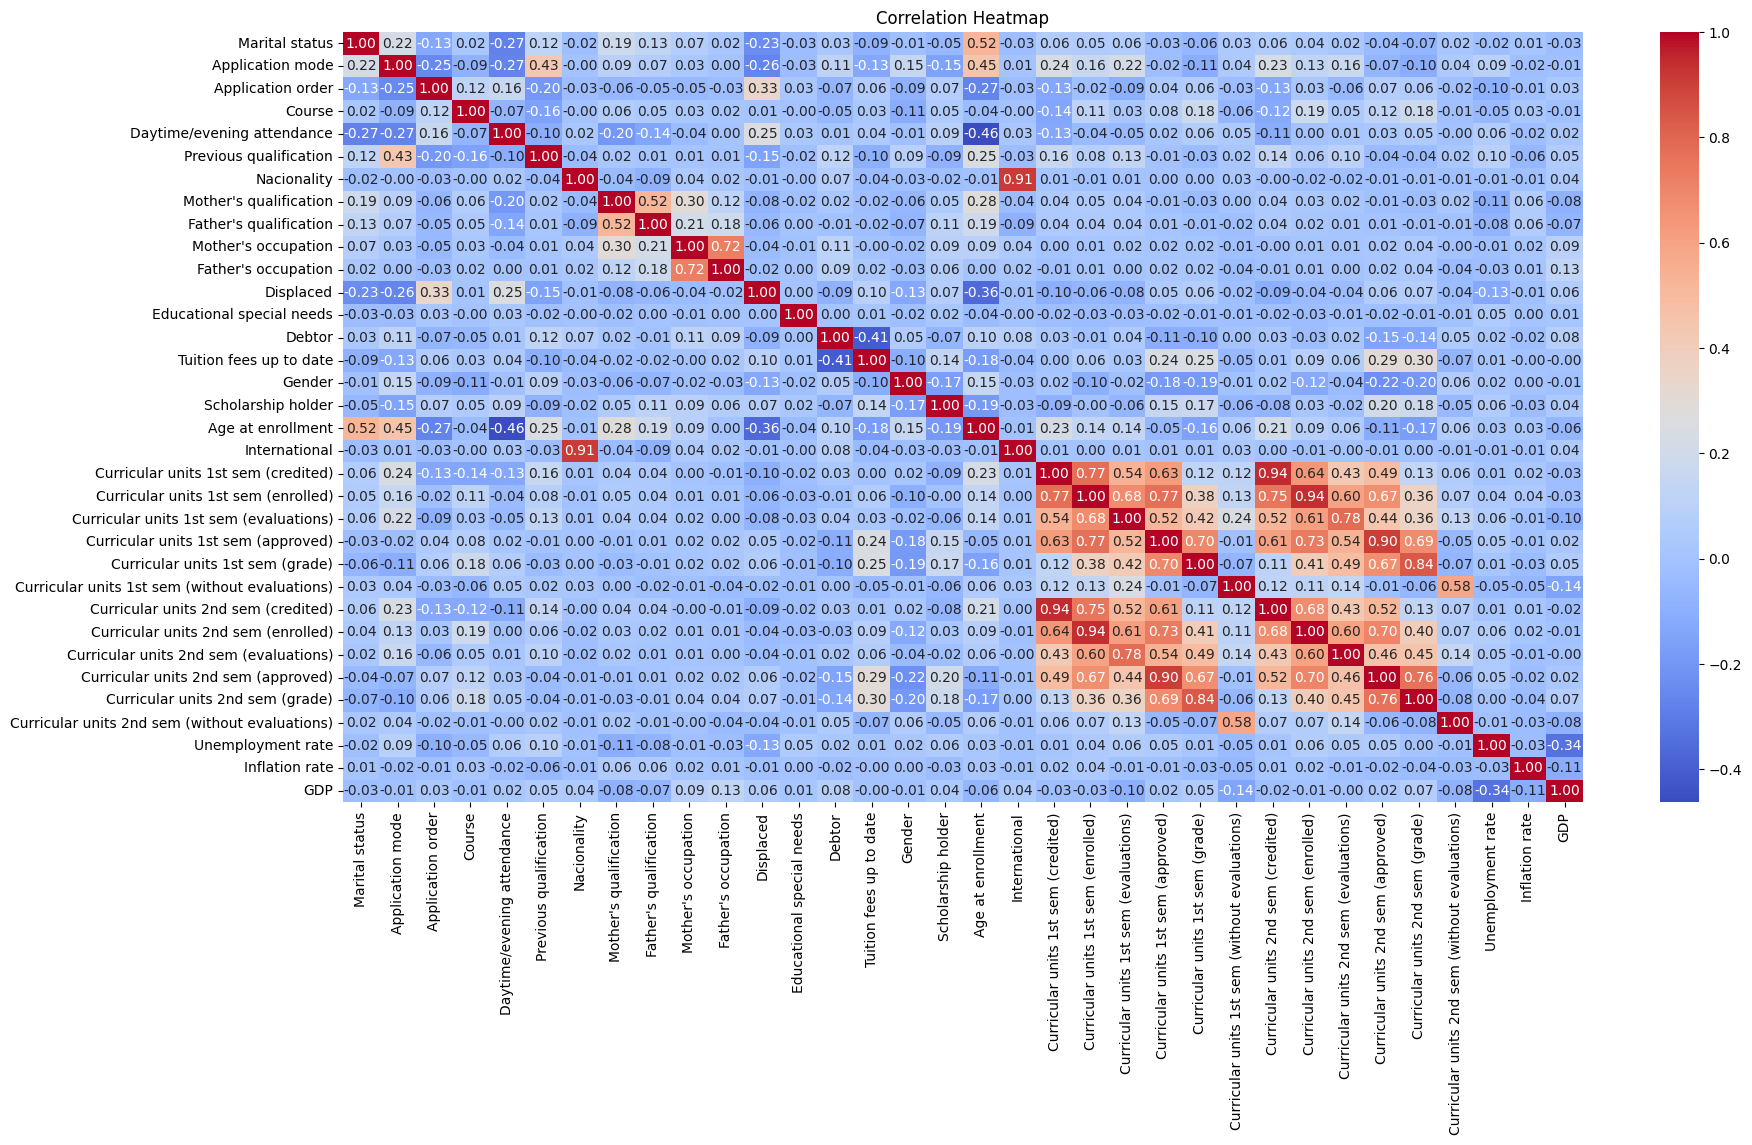

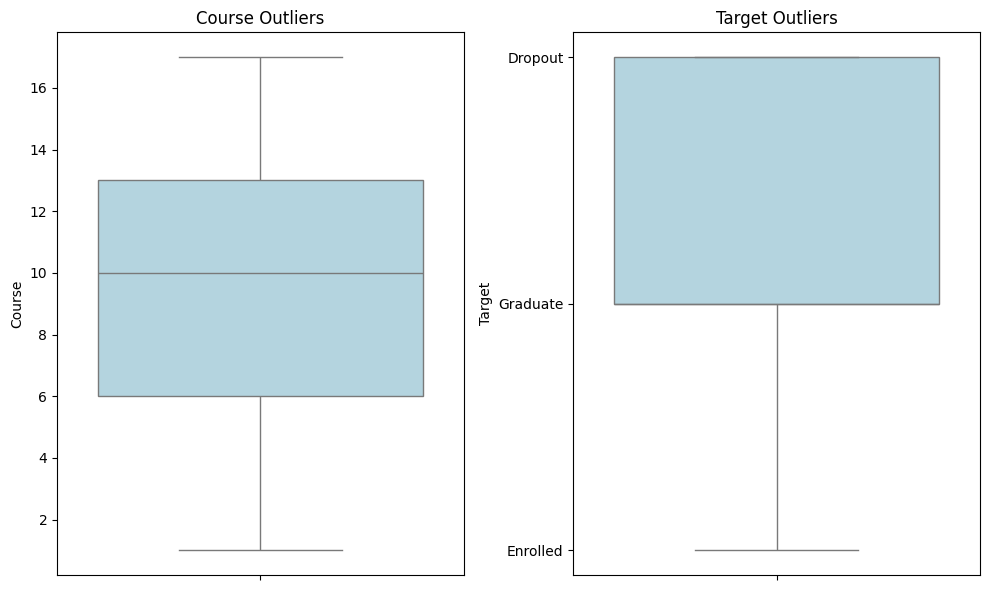

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = '/content/drive/MyDrive/Aggregated_Data/1_datasset1.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Target', palette='pastel')
plt.title('Class Distribution (Dropout vs Graduate)')
plt.xlabel('Target (Dropout/Graduate)')
plt.ylabel('Count')
plt.show()

# Plot distributions of numerical features
numerical_features = ['Course', 'Target']  # Replace with actual column names
df[numerical_features].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black')
plt.suptitle('Numerical Feature Distributions')
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Boxplot for potential outliers in numerical features
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(data=df, y=feature, color='lightblue')
    plt.title(f'{feature} Outliers')
plt.tight_layout()
plt.show()


# 4. **Hypothesis Testing**

We hypothesize that certain numerical features, such as financial stability or
attendance rates, significantly influence student dropout likelihood. In contrast, categorical variables like the target column (dropout, enrolled, or graduate) can indicate trends across groups.
To test these hypotheses:

**1. Correlation Analysis:** We will analyze correlations between normalized numerical features (e.g., grades, financial scores) and the target column to identify patterns.

**2. Encoding and Group Comparisons:** The target column will be encoded into numerical values (dropout=0, enrolled=1, graduate=2), allowing us to apply statistical tests like `ANOVA` to compare means across groups.

**3. Feature Importance:** Using models such as `logistic regression,` we will evaluate the significance of numerical features in predicting dropout likelihood.

**4. Visualizations:** Create `bar charts` and `boxplots` to explore relationships visually and confirm findings.


# 5. **Handling Sparse/Dense Data and Outliers**

*Data Density Assessment*

The dataset will be examined for missing values and inconsistencies. As all features except the target column are numerical, missing entries in these columns will directly impact normalization and model performance.

**Strategies for Handling Missing Data**

**- Imputation for Numerical Features:** Missing values will be replaced with the mean or median to maintain the dataset's integrity during normalization.

**- Target Column Handling:** Missing entries in the target column will be flagged and either imputed using the most frequent category or excluded from analysis to prevent label ambiguity.

**Strategies for Handling Outliers**

*A. Detection:*

- Boxplots will be used to visualize the distribution of numerical features and identify extreme values.

- Statistical methods like `IQR (Interquartile Range)` will help flag numerical outliers.

*B. Treatment:*

- Normalization: The numerical features are scaled using `MinMaxScaler` to mitigate the effect of extreme values without removing data.

- Transformation: For highly skewed data, transformations like the `log scale` can be applied if required.

- Removal: Outliers will only be removed if they are confirmed to be erroneous or irrelevant to the analysis.

These above strategies align with the preprocessing code to ensure the dataset is ready for effective machine learning analysis.


   **Code for Handling Sparse/Dense Data and Outliers**

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
file_path = '/content/drive/MyDrive/Aggregated_Data/1_datasset1.csv'
data = pd.read_csv(file_path)

# Separate features and target
target_column = 'Target'  # Replace with the actual target column name
features = data.drop(columns=[target_column])
target = data[target_column]

# Normalize numerical features
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Encode the target column
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(target)

# Combine normalized features and encoded target
processed_data = pd.concat([normalized_features, pd.Series(encoded_target, name=target_column)], axis=1)

# Save the processed dataset
output_path = '/content/drive/MyDrive/processed_dataset.csv'
processed_data.to_csv(output_path, index=False)

print(f"Processed dataset saved at: {output_path}")


Processed dataset saved at: /content/drive/MyDrive/processed_dataset.csv


# 6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

   The dataset will be split into three subsets: 70% for training, 15% for validation, and 15% for testing. The training set will be used to train the model, the validation set will help tune hyperparameters and monitor performance during training, and the testing set will evaluate the model's final performance. To ensure randomness and representativeness, stratified sampling will be used, maintaining the same proportion of the target variable (dropout vs. non-dropout) across all subsets. A random seed will also be applied to ensure reproducibility of the splits.

# 7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.

 ### **Bias Mitigation**

To identify and mitigate biases in the dataset, we will first examine the distribution of key demographic variables (such as gender, marital status, and financial status) across the target variable (dropout vs. graduate) to check for any disproportionate representation. If certain groups are underrepresented or overrepresented, this could lead to biased predictions.  

To address these biases, we can implement techniques such as:
1. **Re-sampling**: This involves adjusting the dataset to balance the number of samples in each group, either by oversampling underrepresented classes (e.g., increasing dropout cases if they are fewer) or undersampling overrepresented classes (e.g., reducing non-dropout cases if they dominate).
  
2. **Re-weighting**: We can assign higher weights to underrepresented classes during model training, ensuring that the model treats all groups fairly by emphasizing the importance of less frequent classes.

3. **Fairness Constraints**: During model training, we may impose fairness constraints to ensure that the model's predictions are not influenced by sensitive features like gender or marital status, thus reducing the potential for discriminatory outcomes.

Additionally, we will assess model performance across different subgroups to ensure equitable accuracy, precision, and recall, preventing the model from favoring one group over another. This approach ensures fairness and equity in the data representation, minimizing bias in the model's predictions.  


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load the dataset
file_path = '/content/drive/MyDrive/processed_dataset.csv'
data = pd.read_csv(file_path)

# Separate features and target
target_column = 'Target'
features = data.drop(columns=[target_column])
target = data[target_column]

# Data Splitting
# Stratified sampling to maintain target class proportions
train_features, temp_features, train_target, temp_target = train_test_split(
    features, target, test_size=0.3, stratify=target, random_state=42)

val_features, test_features, val_target, test_target = train_test_split(
    temp_features, temp_target, test_size=0.5, stratify=temp_target, random_state=42)

# Display dataset sizes
print(f"Training Set: {len(train_features)} samples")
print(f"Validation Set: {len(val_features)} samples")
print(f"Test Set: {len(test_features)} samples")

# Combine for bias mitigation
train_data = pd.concat([train_features, train_target], axis=1)

# Bias Mitigation - Example: Re-sampling underrepresented classes
# Identify the target classes and their counts
class_counts = train_data[target_column].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Oversample minority class
minority_data = train_data[train_data[target_column] == minority_class]
majority_data = train_data[train_data[target_column] == majority_class]
oversampled_minority_data = resample(
    minority_data,
    replace=True,  # Oversample with replacement
    n_samples=len(majority_data),  # Match size of majority class
    random_state=42
)

# Combine resampled minority class with majority class
balanced_train_data = pd.concat([majority_data, oversampled_minority_data])

# Shuffle the balanced dataset
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42)

# Split back into features and target
balanced_train_features = balanced_train_data.drop(columns=[target_column])
balanced_train_target = balanced_train_data[target_column]

# Save the split datasets
train_output_path = '/content/drive/MyDrive/Aggregated_Data/train_data.csv'
val_output_path = '/content/drive/MyDrive/Aggregated_Data/val_data.csv'
test_output_path = '/content/drive/MyDrive/Aggregated_Data/test_data.csv'

balanced_train_data.to_csv(train_output_path, index=False)
pd.concat([val_features, val_target], axis=1).to_csv(val_output_path, index=False)
pd.concat([test_features, test_target], axis=1).to_csv(test_output_path, index=False)

print(f"Training set saved at: {train_output_path}")
print(f"Validation set saved at: {val_output_path}")
print(f"Test set saved at: {test_output_path}")


Training Set: 3096 samples
Validation Set: 664 samples
Test Set: 664 samples
Training set saved at: /content/drive/MyDrive/Aggregated_Data/train_data.csv
Validation set saved at: /content/drive/MyDrive/Aggregated_Data/val_data.csv
Test set saved at: /content/drive/MyDrive/Aggregated_Data/test_data.csv


# 8. **Features for Model Training:**

   For predicting student dropout rates, the most relevant features include financial status (debtor), academic performance (grades, attendance), and marital status, as these factors are strongly linked to a student’s likelihood of dropping out. Financial difficulties are often a major cause of dropout, making it the most significant feature, followed by academic performance, which serves as a key indicator of student engagement and success. Marital status also plays a crucial role, as married students may face additional responsibilities that affect their ability to continue their studies. Other factors like course, age at enrollment, and gender may influence dropout likelihood but are generally less significant on their own. Previous academic history, if available, can further contribute to dropout prediction, providing insight into a student's academic trajectory. These features, ranked by their impact on dropout prediction, should guide the model's training, with financial and academic factors being the primary focus.


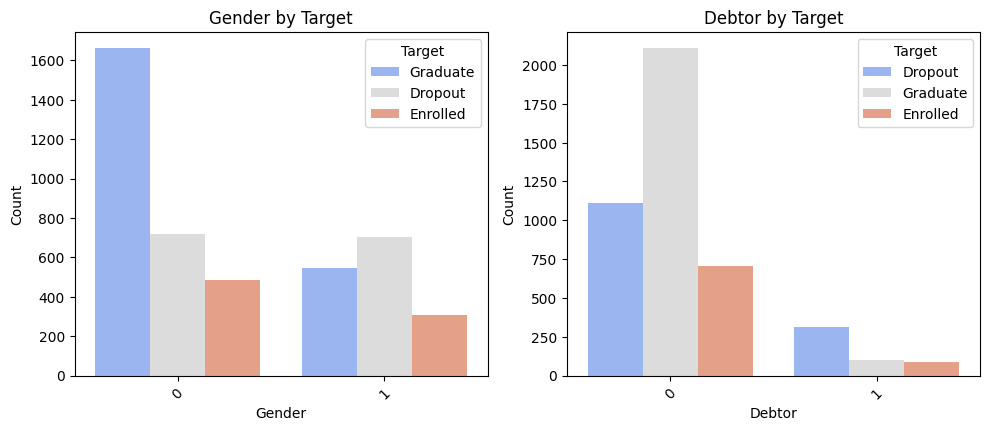

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Aggregated_Data/1_datasset1.csv'
data = pd.read_csv(file_path)

# Specify the features and target
target_column = 'Target'
focus_features = ['Gender', 'Debtor']

# Plot the distributions of the focus features against the target
plt.figure(figsize=(10, 8))
for i, feature in enumerate(focus_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=feature, hue=target_column, palette="coolwarm")
    plt.title(f"{feature} by {target_column}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title=target_column, loc='upper right')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. **Types of Data Handling:**

#### **1. Data Classification**  
- **Categorical Data**:  
   - Feature: `Target` (e.g., Dropout, Enrolled, Graduate).

- **Numerical Data**:  
   - Features: `Grades`, `Attendance Rate`, `Age at Enrollment`, `Debtor`, etc.  

#### **2. Preprocessing Plan**  

- **Categorical Data**:  
   - **Encoding**:  
      - *One-Hot Encoding*: For features like `Course`.  
      - *Label Encoding*: For features like `Target`.  

   - **Outlier Handling**: Standardize inconsistent labels (e.g., unify `Male` and `0` for example representation).  

- **Numerical Data**:  
   - **Normalization**: Scale features like `Grades` using Min-Max Scaling.  
   - **Imputation**: Fill missing values with the mean or median.  
   - **Outlier Handling**: Use Z-scores or IQR to detect and manage extreme values.  

This organized preprocessing ensures the dataset is clean, balanced, and ready for analysis.




# 10. **Data Transformation for Modeling:**

To transform raw data into a model-friendly format, we will apply the following preprocessing steps:

**Normalization and Scaling:**

`Normalization:` For features like `Age at enrollment` or `Curricular units`, we will use `Min-Max scaling` to scale the data between `0` and `1`. This ensures that all features have the same range, which is particularly important for distance-based models like `k-NN.`

`Standardization:` For features with higher variance or outliers (e.g., `GDP,` `Unemployment rate`), we will apply `Z-score standardization,` where the values are centered around the mean with a unit standard deviation. This is especially useful for models like `logistic regression` and `SVM,` which are sensitive to the scale of features.

**Encoding Categorical Variables:**

*One-Hot Encoding:* For nominal categorical variables (e.g., `Target`), we will use One-Hot Encoding to create binary columns for each category. This avoids introducing any ordinal relationships between categories.

*Label Encoding:* For ordinal categorical variables (e.g., "Tuition fees up to date"), if applicable, we will use Label Encoding to assign an integer to each category.

These transformations ensure that the data is in a consistent, numerical format that is ready for model training, helping the algorithms interpret the features effectively.

# 11. **Data Storage:**

To store the processed data, we will choose suitable storage solutions that offer both accessibility and security:

**Local Storage:**

The processed dataset can be stored locally in formats such as CSV or Parquet for quick access during modeling. However, this option may not be scalable for very large datasets.
Use version control to track changes to the data, especially when iterating over different preprocessing methods.

**Cloud Storage:**

Cloud Databases: For more scalable solutions, cloud databases like AWS S3, Google Cloud Storage, or Azure Blob Storage can be used. These platforms support large file storage, with secure access and easy sharing capabilities.
Relational Databases (SQL): For structured datasets, storing the processed data in relational databases like MySQL or PostgreSQL ensures organized storage and allows for complex queries and data manipulation.
Security and Access:

Data storage should be encrypted to ensure confidentiality, especially if sensitive information (e.g., student demographics) is involved. Services like AWS S3 provide encryption options both at rest and in transit.
Access to the data should be restricted through permissions and access controls, ensuring that only authorized users can access or modify the dataset.
By choosing appropriate storage solutions, we can ensure the processed data remains accessible, secure, and easy to manage throughout the project.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.



 -----------------         `©2024 The African Leadership University (ALU)`      ---------------------------------